In [3]:
import telluric as tl

In [4]:
raster = tl.GeoRaster2.open('1_cloudoptimized.tif')

In [19]:
fc = tl.FeatureCollection([tl.GeoFeature(raster.footprint(), {'raster_url': raster._filename})])

In [20]:
import os
from tile_server import TileServer

creating pool size 30
creating pool size 30


In [21]:
ts = TileServer(fc)

In [22]:
ts.get_url()


'http://localhost:4444/tiles/{z}/{x}/{y}'

In [23]:
print(ts.get_start_point())

(-36.52616021766837, 146.43140670632363)


In [24]:
m = ts.get_folium_client()

In [25]:
ts.start()

In [26]:
m

Serving tile ['8', '232', '155'] args
returnd .... [8, 232, 155] args
time -  3.240475654602051 - 8


Serving tile ['8', '232', '157'] args
returnd .... [8, 232, 157] args
Serving tile ['8', '232', '154'] args
returnd .... [8, 232, 154] args
Serving tile ['8', '231', '154'] args
returnd .... [8, 231, 154] args
Serving tile ['8', '233', '154'] args
returnd .... [8, 233, 154] args
Serving tile ['8', '232', '156'] args
returnd .... [8, 232, 156] args
Serving tile ['8', '231', '155'] args
returnd .... [8, 231, 155] args
Serving tile ['8', '233', '155'] args
returnd .... [8, 233, 155] args
Serving tile ['8', '231', '156'] args
returnd .... [8, 231, 156] args
Serving tile ['8', '233', '156'] args
returnd .... [8, 233, 156] args
Serving tile ['8', '231', '157'] args
returnd .... [8, 231, 157] args
Serving tile ['8', '230', '154'] args
returnd .... [8, 230, 154] args
Serving tile ['8', '234', '154'] args
returnd .... [8, 234, 154] args
Serving tile ['8', '233', '157'] args
returnd .... [8, 233

returnd .... [14, 14855, 9979] args
time -  0.2989194393157959 - 14


Serving tile ['15', '29713', '19961'] args
returnd .... [15, 29713, 19961] args
time -  0.14070487022399902 - 15


Serving tile ['15', '29713', '19960'] args
returnd .... [15, 29713, 19960] args
time -  0.15514421463012695 - 15


Serving tile ['15', '29712', '19960'] args
returnd .... [15, 29712, 19960] args
time -  0.16283345222473145 - 15


Serving tile ['15', '29714', '19961'] args
returnd .... [15, 29714, 19961] args
time -  0.1434345245361328 - 15


Serving tile ['15', '29713', '19959'] args
returnd .... [15, 29713, 19959] args
time -  0.1664416790008545 - 15


Serving tile ['15', '29714', '19960'] args
returnd .... [15, 29714, 19960] args
time -  0.16309237480163574 - 15


Serving tile ['15', '29714', '19959'] args
returnd .... [15, 29714, 19959] args
time -  0.17693305015563965 - 15


Serving tile ['15', '29715', '19960'] args
returnd .... [15, 29715, 19960] args
time -  0.09766030311584473 - 15


Serving tile

time -  0.1484384536743164 - 17


Serving tile ['17', '118851', '79840'] args
returnd .... [17, 118851, 79840] args
time -  0.10383987426757812 - 17


Serving tile ['17', '118853', '79840'] args
returnd .... [17, 118853, 79840] args
time -  0.0941612720489502 - 17


Serving tile ['17', '118852', '79838'] args
returnd .... [17, 118852, 79838] args
time -  0.09543275833129883 - 17


Serving tile ['17', '118854', '79840'] args
returnd .... [17, 118854, 79840] args
time -  0.09314465522766113 - 17


Serving tile ['17', '118850', '79840'] args
returnd .... [17, 118850, 79840] args
time -  0.09499883651733398 - 17


Serving tile ['17', '118850', '79839'] args
returnd .... [17, 118850, 79839] args
time -  0.09275650978088379 - 17


Serving tile ['17', '118853', '79838'] args
returnd .... [17, 118853, 79838] args
time -  0.09254145622253418 - 17


Serving tile ['17', '118854', '79841'] args
returnd .... [17, 118854, 79841] args
time -  0.09656333923339844 - 17


Serving tile ['17', '118854', '

In [5]:
tile = raster.get_tile(118847, 79839, 17)

In [15]:
(tile.image.mask == False).all()

True

In [18]:
tile.image.data[tile.image.data==0]

array([], dtype=uint8)

In [31]:
tile2 = raster.get_tile(237706, 159678, 18)
tile3 = raster.get_tile(237707, 159678, 18)

In [70]:
fc2 = tl.FeatureCollection([tl.GeoFeature(tile2.footprint(), {}), tl.GeoFeature(tile3.footprint(), {})])

In [71]:
tile.shape


(3, 256, 256)

In [72]:
roi = fc2.convex_hull
merged = tl.georaster.merge_all([tile2, tile3], roi)

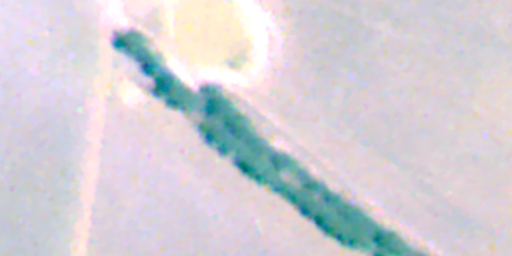

In [73]:
merged

In [74]:
from IPython.display import Image

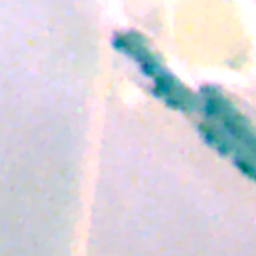

In [75]:
Image(tile2.to_png())

In [99]:
arr = 1 * (tile2.image.data==tile2.image.data.max())
arr

array([[[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])

In [100]:
import numpy as np


In [101]:
raster3 = tile3.copy_with(image=arr)

/home/ariel/projects/telluric/telluric/telluric/georaster.py:981: GeoRaster2Warning: downscaling dtype to 'uint8' to convert to png
  GeoRaster2Warning)


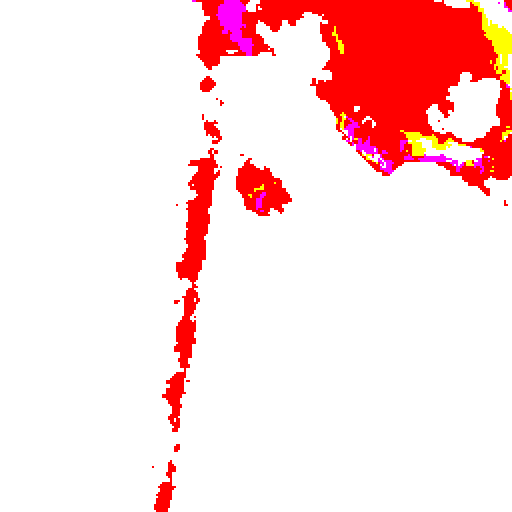

In [102]:
raster3

In [81]:
fc2.plot()

Map(basemap={'min_zoom': 0, 'name': 'Stamen.Terrain', 'max_zoom': 18, 'attribution': 'Map tiles by <a href="ht…

In [103]:
url = 'https://{s}.integration.telluric.satellogic.com/v1/tiles/731_tile.png?product=RGBEnhanced&filter_start_time=2018-01-26T23:42:31.472Z&filter_end_time=2018-02-25T23:42:31.472Z&x={x}&y={y}&z={z}&auth_token=JWT%20eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJvcmlnX2lhdCI6MTUyNTI3NDk3OSwidXNlcm5hbWUiOiJhcmllbHoiLCJleHAiOjE1MjU5MzIxNzgsImVtYWlsIjoiYXJpZWx6QHNhdGVsbG9naWMuY29tIiwidXNlcl9pZCI6MTN9.zzRljiorAZYWY7SUSEz__J87bXNv5Ts3IcZcTb6tZm8'

In [104]:
import folium


In [105]:
fc.rasters_executor == fc2.rasters_executor

True